In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Load dataset

In [ ]:
auto_prices=pd.read_csv("/content/drive/MyDrive/Automobile price data _Raw_.csv")

In [ ]:
auto_prices.shape

(205, 26)

In [ ]:
auto_prices.head()

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

In [ ]:
auto_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

We can see that datatypes of few columns (eg: price, horsepower, peakrpm) are incorrect. We will have to transform them to appropriate types.

# **Data Cleaning**

In [ ]:
# fix column names so the '-' character becomes '_'
cols = auto_prices.columns
auto_prices.columns = [str.replace('-', '_') for str in cols]

Check for missing values

In [ ]:
auto_prices.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

We can observe that missing values are represented using '?'

In [ ]:
missingcol=[]
for col in auto_prices.columns:
  val=auto_prices[col].unique()
  if '?' in val:
    missingcol.append(col)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


Columns with missing values

In [ ]:
missingcol

['normalized_losses',
 'num_of_doors',
 'bore',
 'stroke',
 'horsepower',
 'peak_rpm',
 'price']

No.of missing values

In [ ]:
for i in missingcol:
  print(i,auto_prices[auto_prices[i]=='?'].shape[0])

normalized_losses 41
num_of_doors 2
bore 4
stroke 4
horsepower 2
peak_rpm 2
price 4


We can drop the column normalized_losses with very high missing values

In [ ]:
auto_prices.drop(['normalized_losses'],axis=1,inplace=True)

In [ ]:
auto_prices.columns

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In other columns, we can remove the records with missing values

In [ ]:
missingcol.remove('normalized_losses')
for column in missingcol:    
  auto_prices.loc[auto_prices[column] == '?', column] = np.nan
auto_prices.dropna(axis = 0, inplace = True)

In [ ]:
auto_prices.shape

(193, 25)

In [ ]:
for c in auto_prices.columns:
  if auto_prices.dtypes[c]=='object':
    print("For column ",c,":\n",auto_prices[c].value_counts())

For column  make :
 toyota           32
nissan           18
honda            13
mitsubishi       13
volkswagen       12
subaru           12
mazda            12
volvo            11
peugot           11
bmw               8
dodge             8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64
For column  fuel_type :
 gas       174
diesel     19
Name: fuel_type, dtype: int64
For column  aspiration :
 std      158
turbo     35
Name: aspiration, dtype: int64
For column  num_of_doors :
 four    112
two      81
Name: num_of_doors, dtype: int64
For column  body_style :
 sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64
For column  drive_wheels :
 fwd    114
rwd     71
4wd      8
Name: drive_wheels, dtype: int64
For column  engine_location :
 front    190

We can identify the columns of object dtype which should be numeric:

In [ ]:
num_cols=['bore','stroke','horsepower','peak_rpm','price']
for c in num_cols:
  auto_prices[c]=pd.to_numeric(auto_prices[c])

In [ ]:
auto_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_of_doors       193 non-null    object 
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    object 
 14  num_of_cylinders   193 non-null    object 
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

# **Data Visualization**

Barplots for Categorical Variables

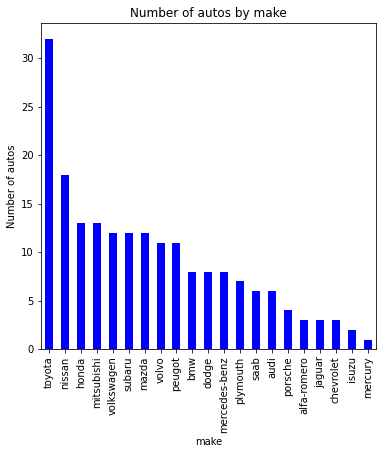

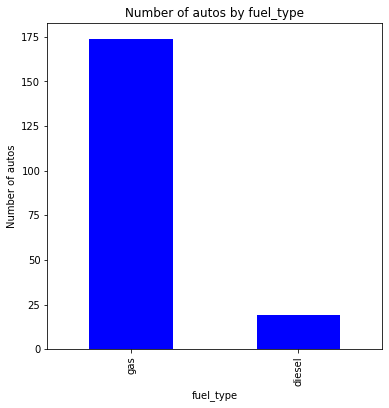

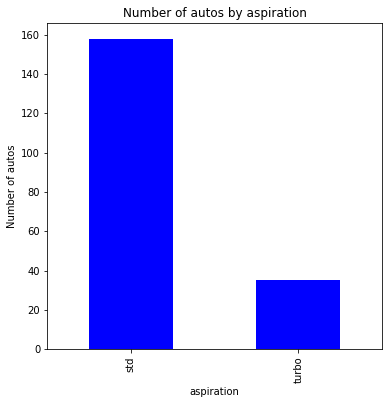

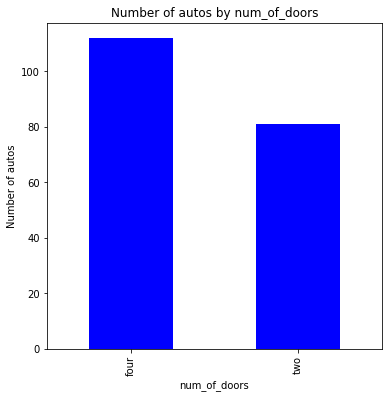

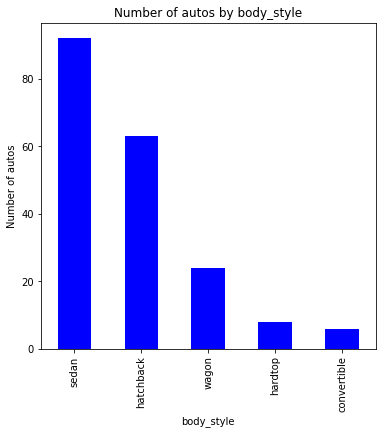

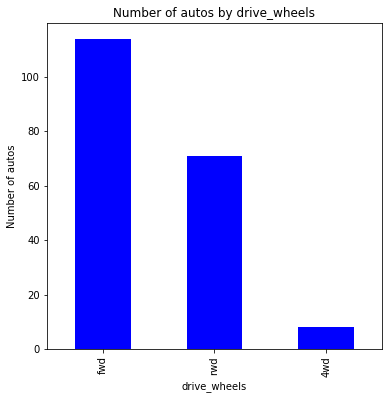

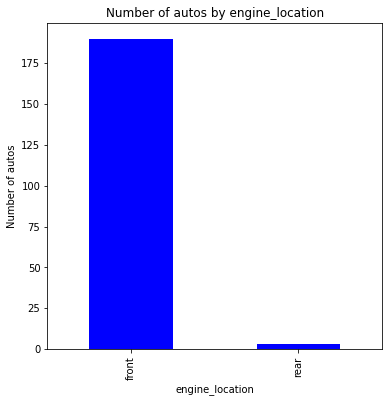

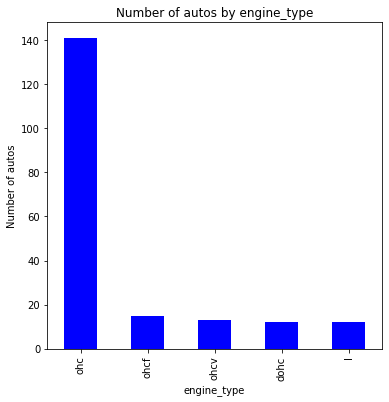

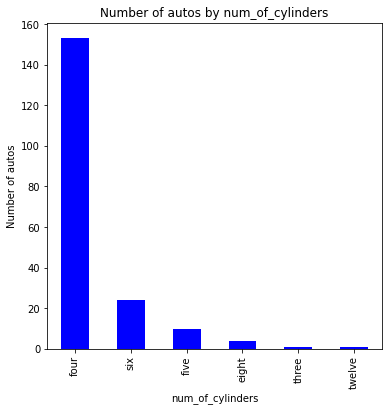

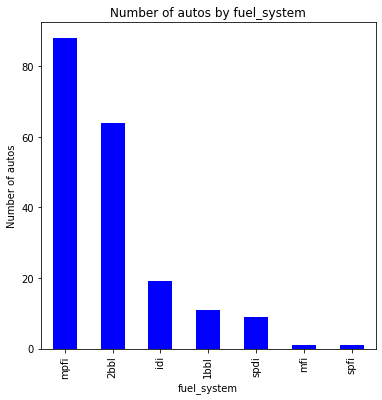

In [ ]:
def plot_bars(auto_prices, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = auto_prices[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of autos by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()

cat_cols=[]
for c in auto_prices.columns:
  if auto_prices.dtypes[c]=='object':
    cat_cols.append(c)
cat_cols
plot_bars(auto_prices, cat_cols)

We can see that there are very few instances under few categories (e.g.,make and num_of_cylinders )
These categories should be aggregated to make a better model

kde plots combined with histogram to visualize numerical variables

In [ ]:
import warnings
warnings.filterwarnings("ignore")

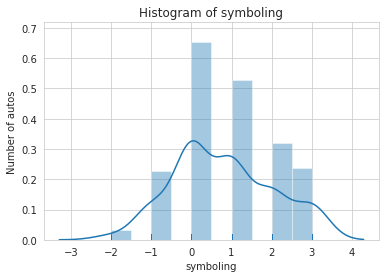

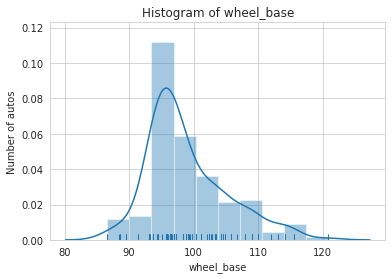

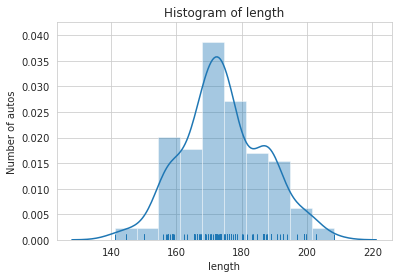

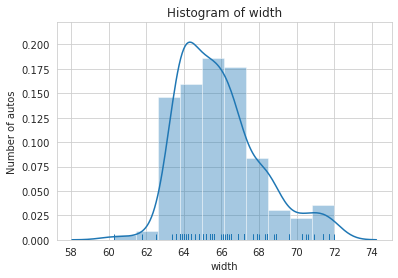

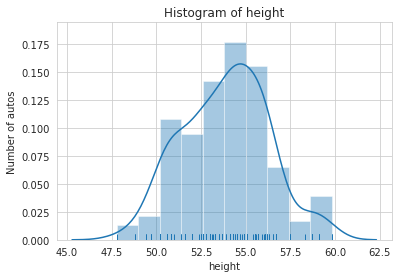

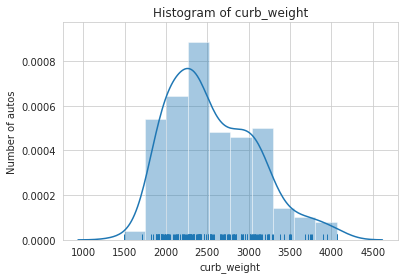

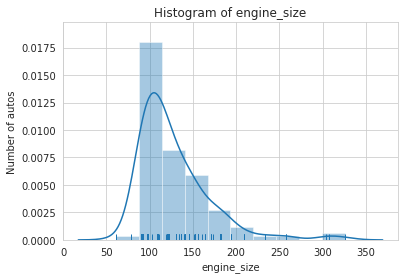

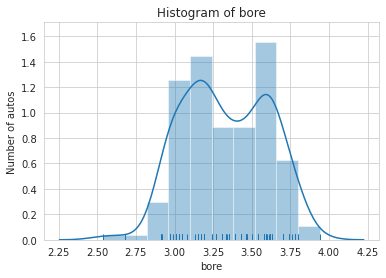

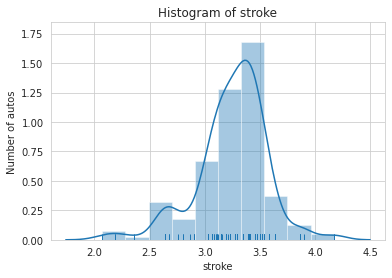

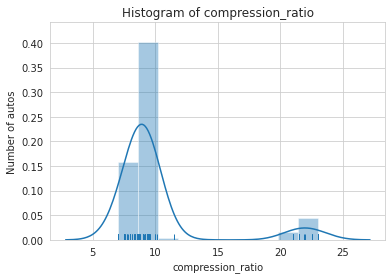

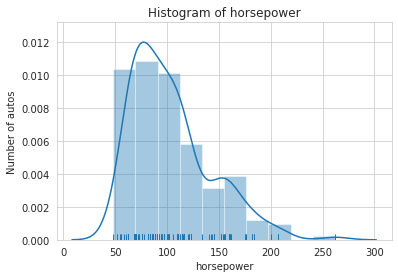

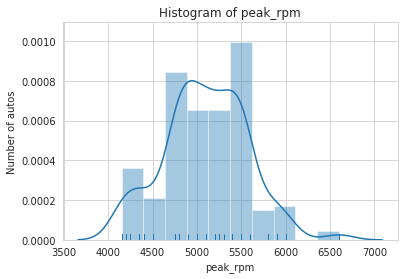

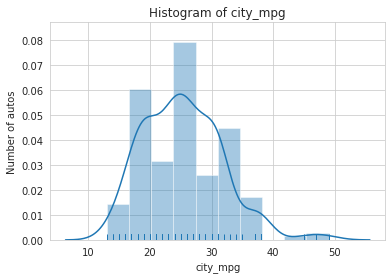

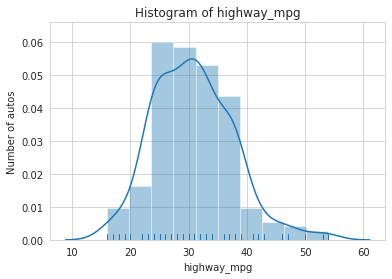

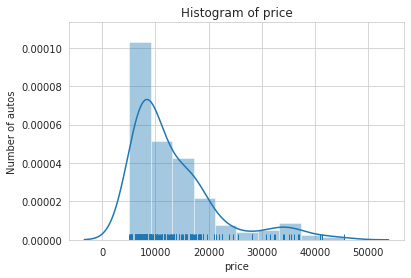

In [ ]:
def plot_density_hist(auto_prices, cols, bins = 10, hist = True):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of autos')# Set text for y axis
        plt.show()

num_cols=[]
for c in auto_prices.columns:
  if auto_prices.dtypes[c]!='object':
    num_cols.append(c)
    
plot_density_hist(auto_prices, num_cols)        

We observe that a few features have right-skewed distribution

2-D scatter plots to understand relationship between the independent features and price

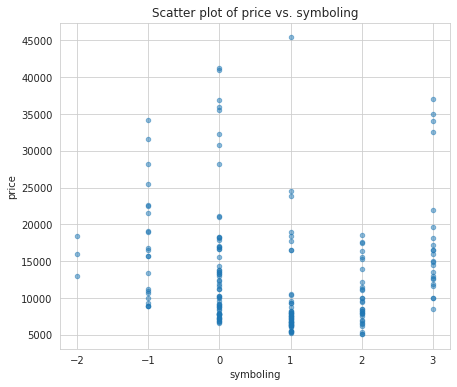

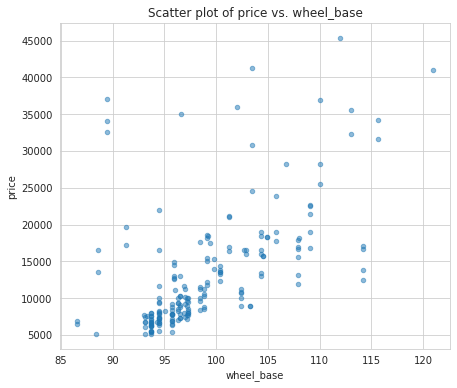

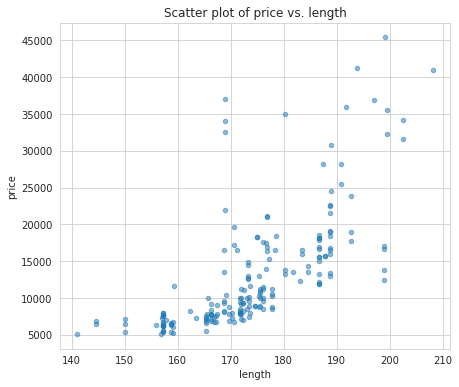

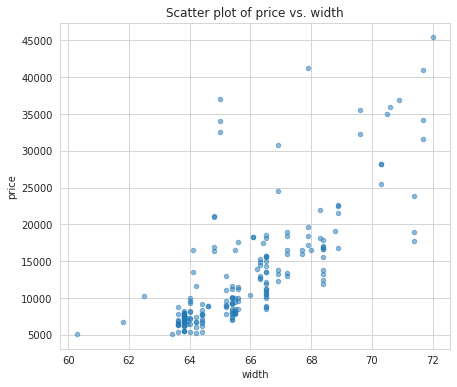

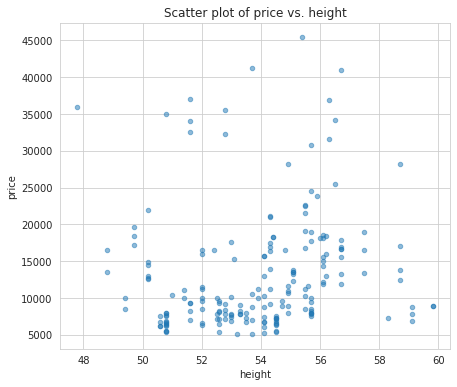

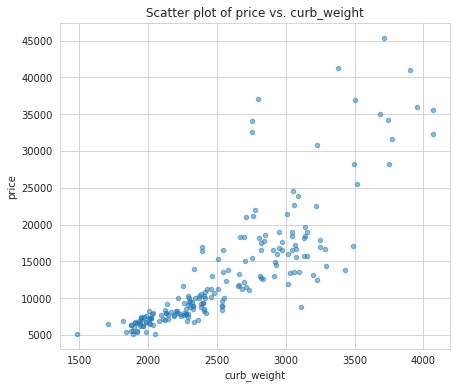

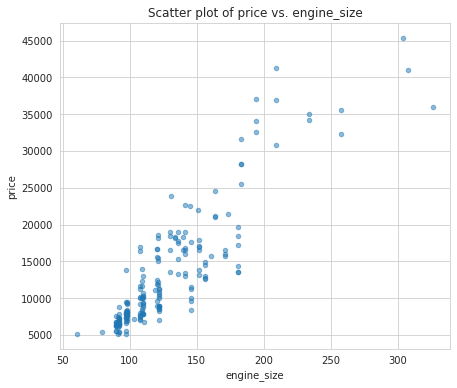

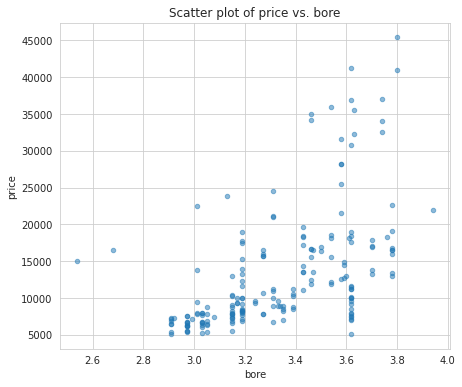

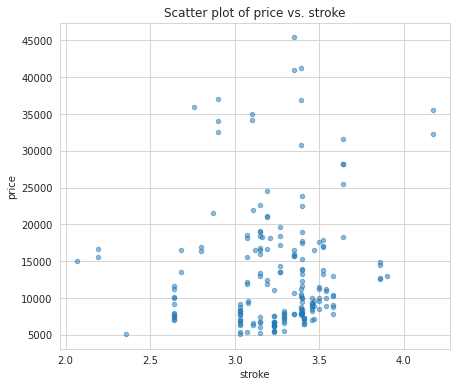

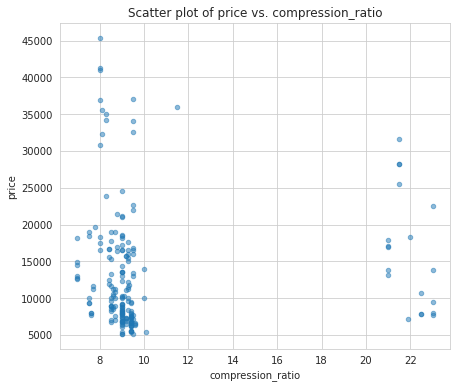

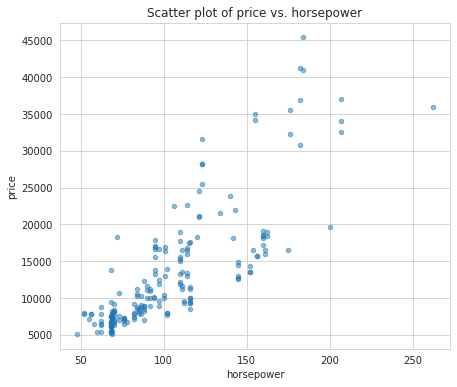

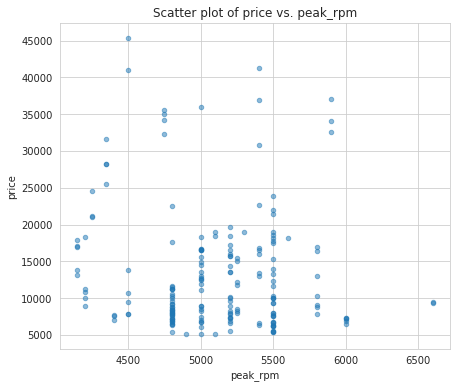

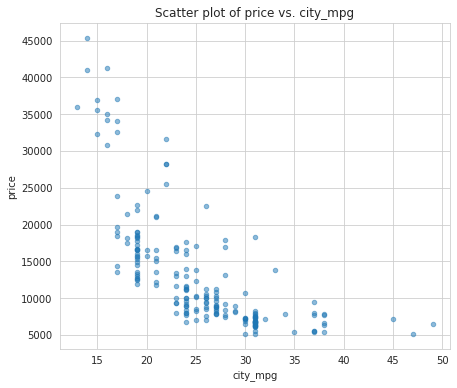

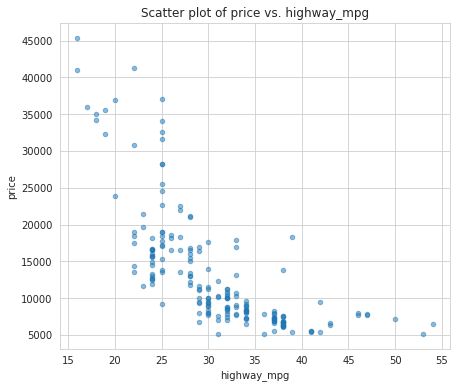

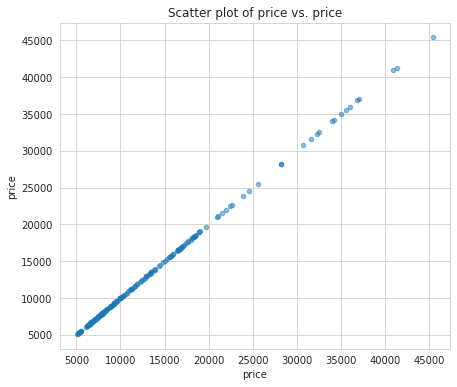

In [ ]:
def plot_scatter(auto_prices, cols, col_y = 'price'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax,alpha=0.5)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

plot_scatter(auto_prices, num_cols)        

These plots show a strong relationship between these features and the label. It is likely these features will be useful in predicting the price of autos. engine_size and horsepower have fairly linear relationships with price, whereas curb_weight and especially city_mpg do not. 

It seems likely that horsepower and engine_size are colinear:

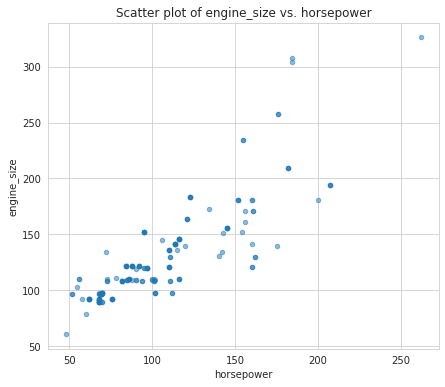

In [ ]:
plot_scatter(auto_prices,['horsepower'],'engine_size'
)

As these two features hav a strong linear relationship, we will not want to use them together in a model

Joint plots can combine the 1-D plots and 2-D plots:

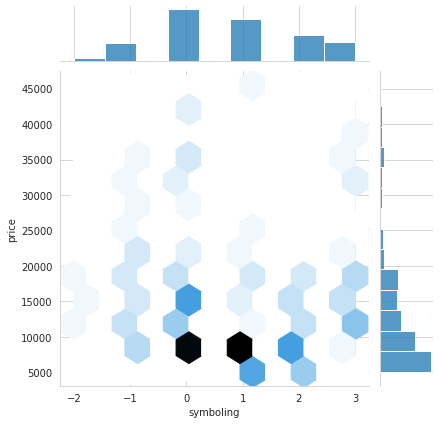

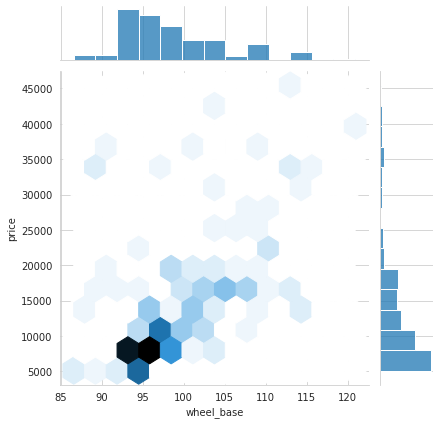

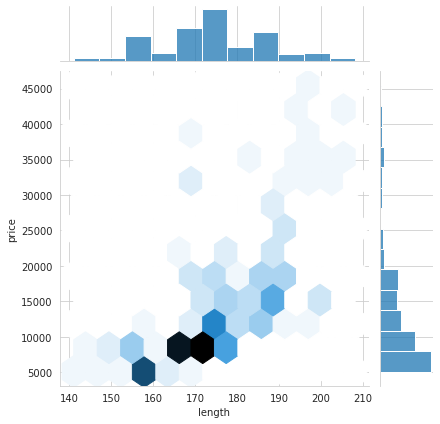

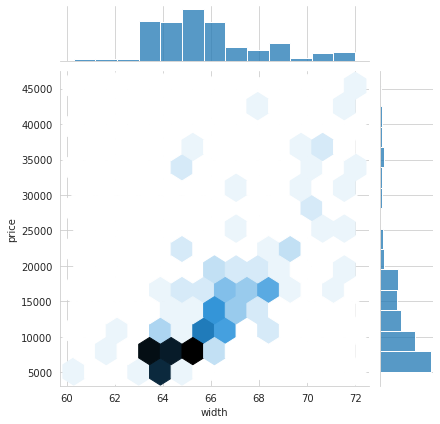

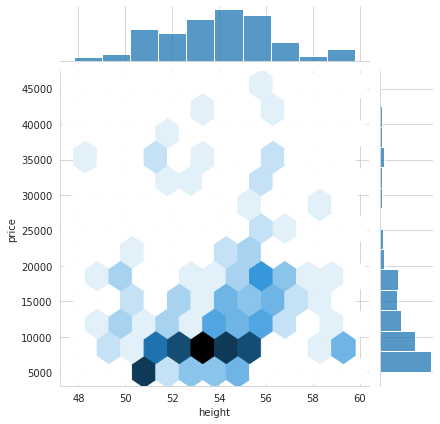

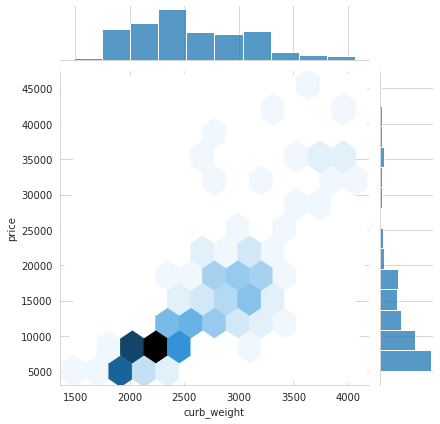

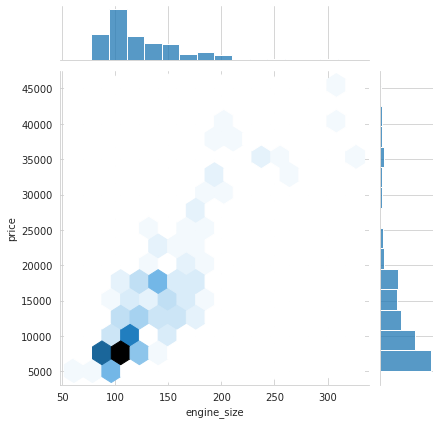

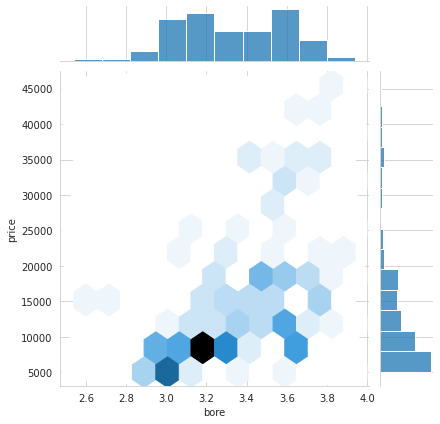

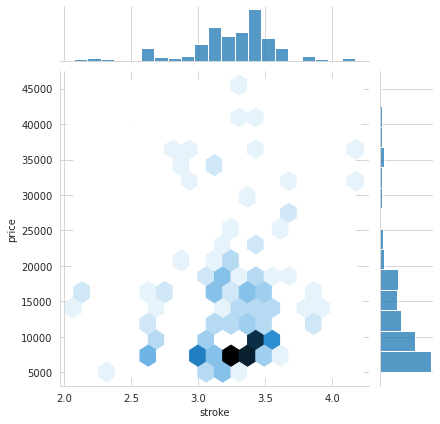

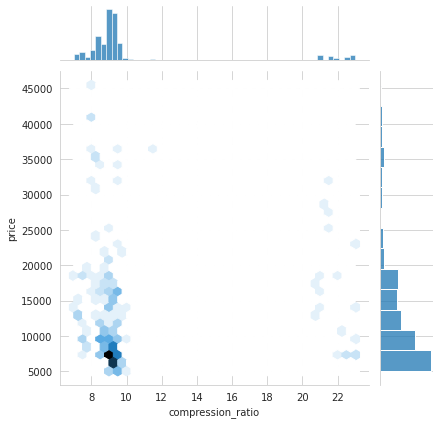

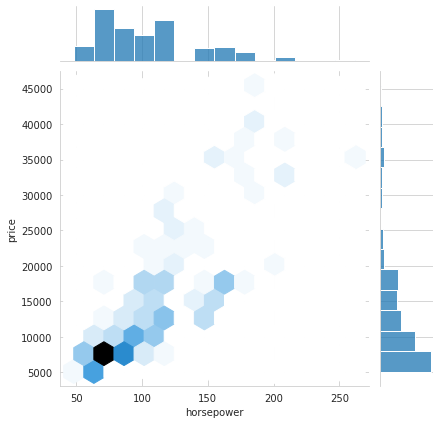

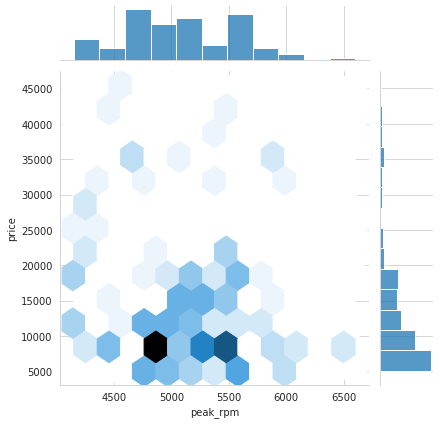

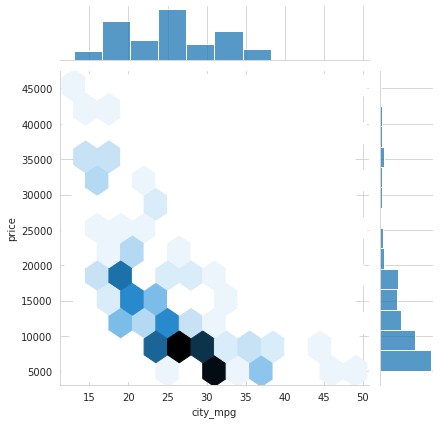

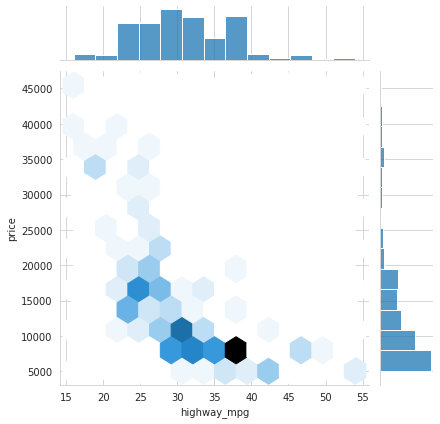

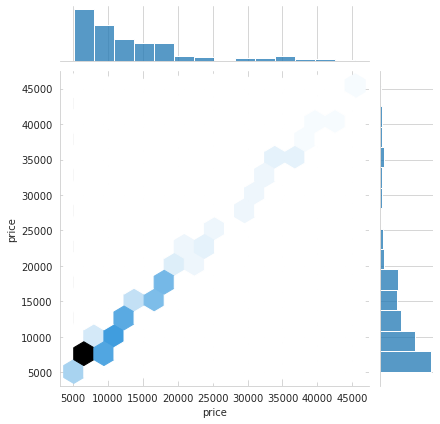

In [ ]:
def plot_desity_2d(auto_prices, cols, col_y = 'price', kind ='hex'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=auto_prices, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(auto_prices, num_cols)      

Relationship between categorical and numeric variables:

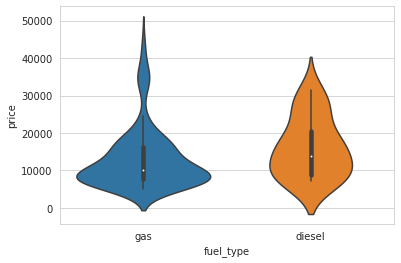

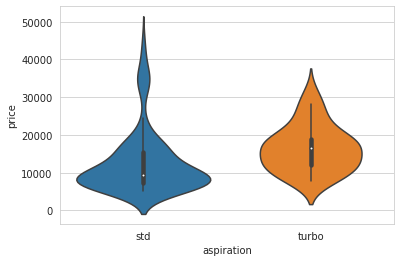

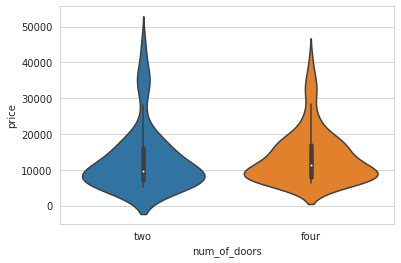

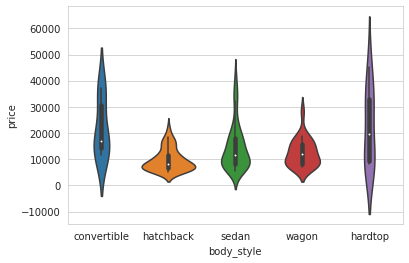

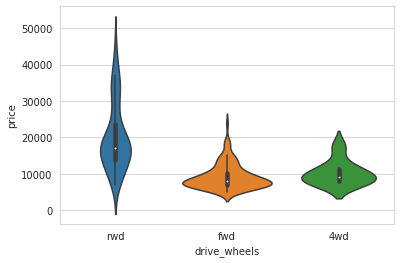

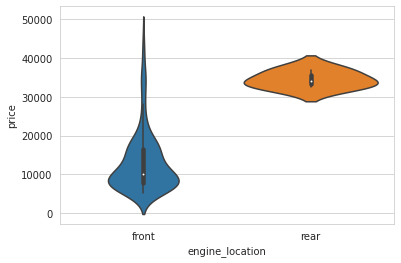

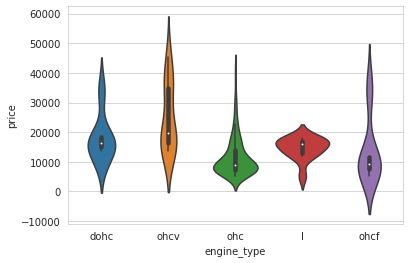

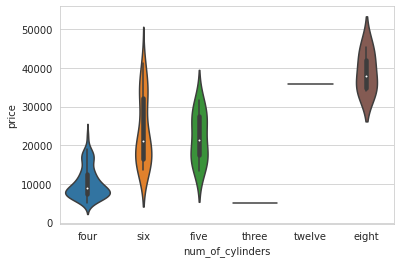

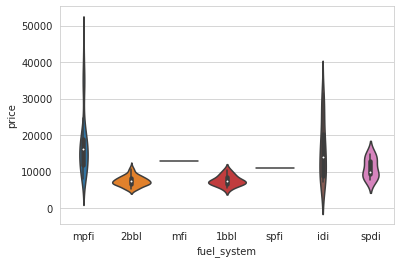

In [ ]:
def plot_violin(auto_prices, cols, col_y = 'price'):
    for col in cols:
        if col!='make':
          sns.set_style("whitegrid")
          sns.violinplot(col, col_y, data=auto_prices)
          plt.xlabel(col) # Set text for the x axis
          plt.ylabel(col_y)# Set text for y axis
          plt.show()


plot_violin(auto_prices, cat_cols)    

For some of these cases, there are some noticeable differences between the price of autos by category. For example, for fuel_type or aspiration there are noticeable differences. In other cases, such as num_of_doors, the differences do not appear significant. For num_of_cylinders there are significant differences, but there are two categories with only one case, which is problematic. 

Pairwise scatterplot

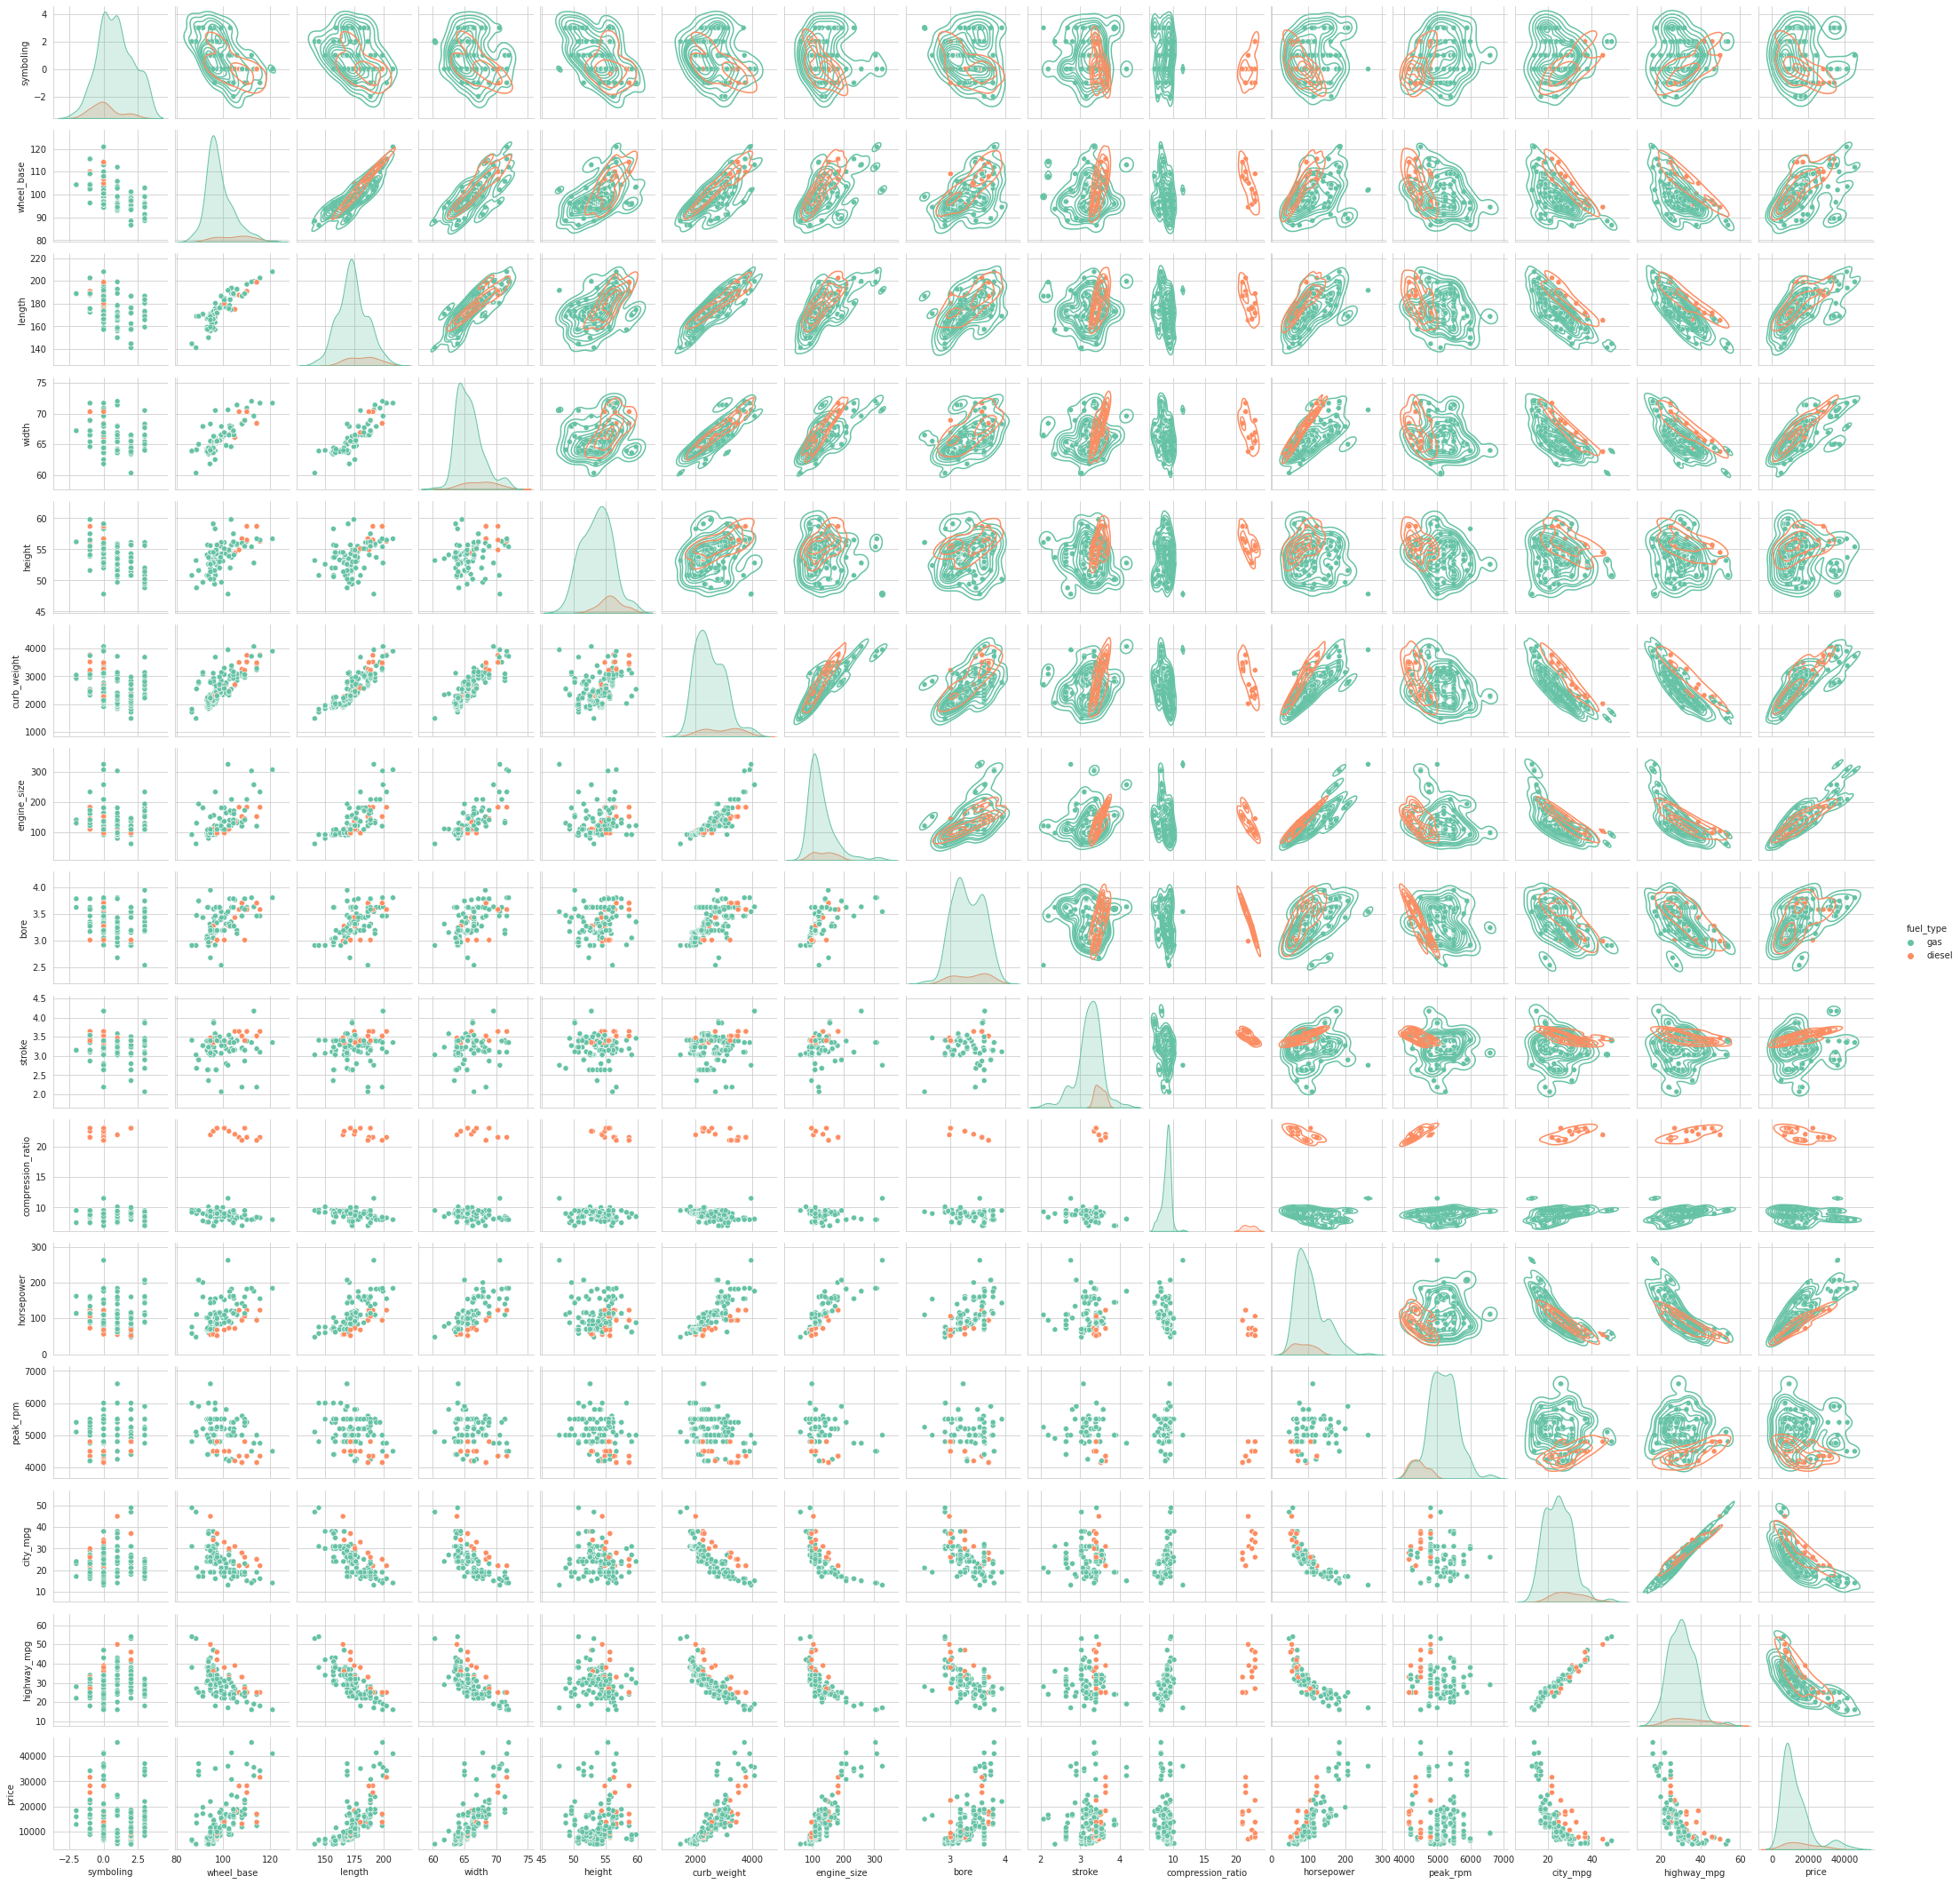

In [ ]:
sns.pairplot(auto_prices, hue='fuel_type', palette="Set2", diag_kind="kde", size=2).map_upper(sns.kdeplot, cmap="Blues_d")

Correlation matrix

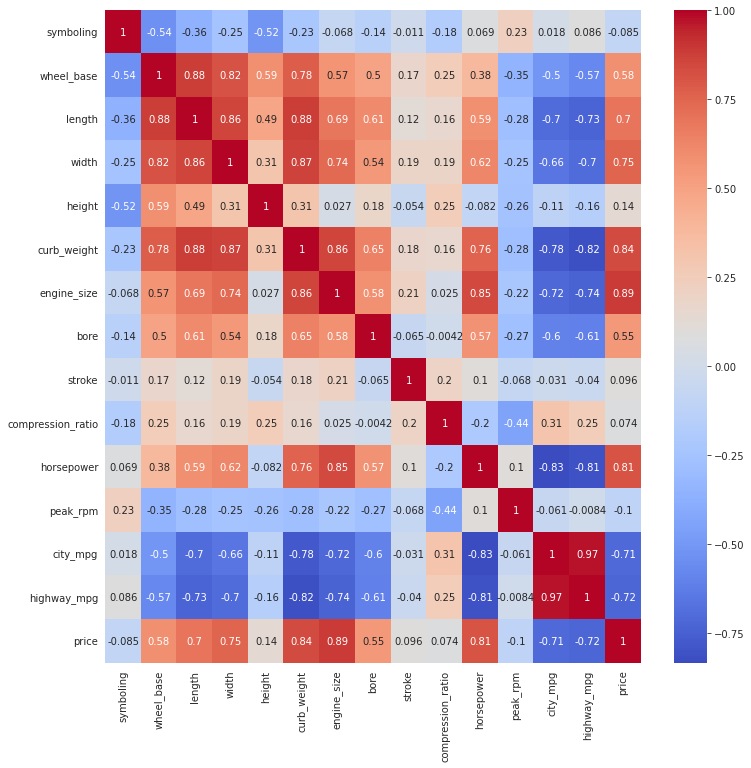

In [ ]:
corrmat=auto_prices.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corrmat,annot=True,cmap='coolwarm')

We can also observe that highway_mpg and city_mpg are highly correlated

Stroke, compression ratio and height are poorly correlated with price




In [ ]:
def plot_box(auto_prices, cols, col_y = 'price'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=auto_prices)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders']

**Feature Engineering and transforming variables**

Aggregating categorical columns:
From the visualization plots we observed that there are very few members under few classes of the categorical features. We can aggregate such classes with related classes

Feature: num_of_cylinders

In [ ]:
auto_prices['num_of_cylinders'].value_counts()

four      153
six        24
five       10
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [ ]:
cylinder_categories = {'three':'three_four', 'four':'three_four', 
                    'five':'five_six', 'six':'five_six',
                    'eight':'eight_twelve', 'twelve':'eight_twelve'}
auto_prices['num_of_cylinders'] = [cylinder_categories[x] for x in auto_prices['num_of_cylinders']]
auto_prices['num_of_cylinders'].value_counts()

three_four      154
five_six         34
eight_twelve      5
Name: num_of_cylinders, dtype: int64

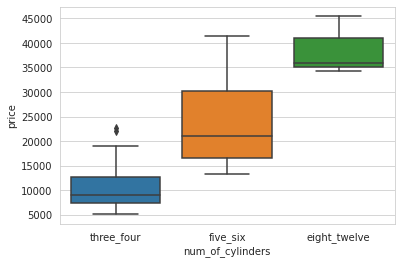

In [ ]:
plot_box(auto_prices,['num_of_cylinders'])

Feature: body_style

In [ ]:
auto_prices['body_style'].value_counts()

sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [ ]:
body_cats = {'sedan':'sedan', 'hatchback':'hatchback', 'wagon':'wagon', 
             'hardtop':'hardtop_convert', 'convertible':'hardtop_convert'}
auto_prices['body_style'] = [body_cats[x] for x in auto_prices['body_style']]
auto_prices['body_style'].value_counts()

sedan              92
hatchback          63
wagon              24
hardtop_convert    14
Name: body_style, dtype: int64

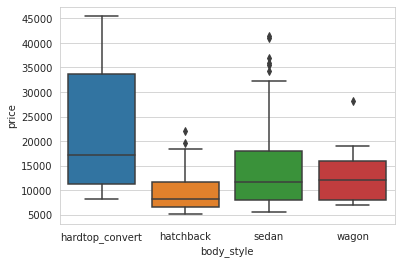

In [ ]:
plot_box(auto_prices,['body_style'])

Transform price column

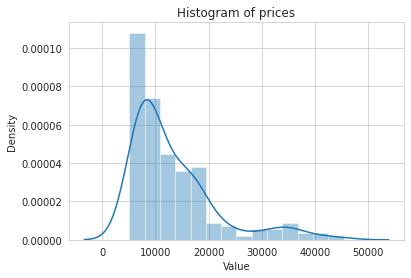

In [ ]:
def hist_plot(vals, section):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + section)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(auto_prices['price'], 'prices')

The distribution of auto price is both quite skewed to the left and multimodal. Given the skew and the fact that there are no values less than or equal to zero, a log transformation might be appropriate.

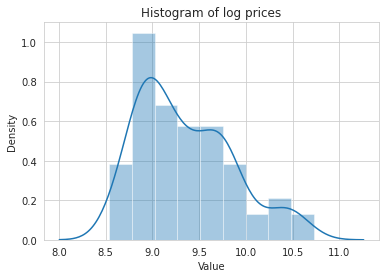

In [ ]:
auto_prices['log_price'] = np.log(auto_prices['price'])
hist_plot(auto_prices['log_price'],'log prices')

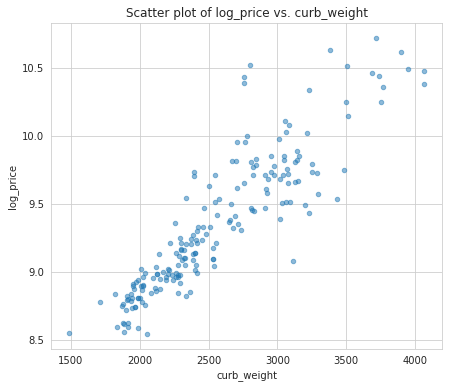

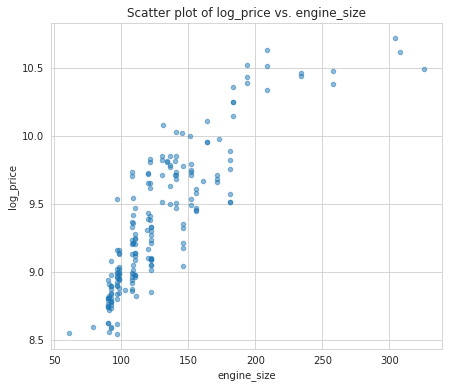

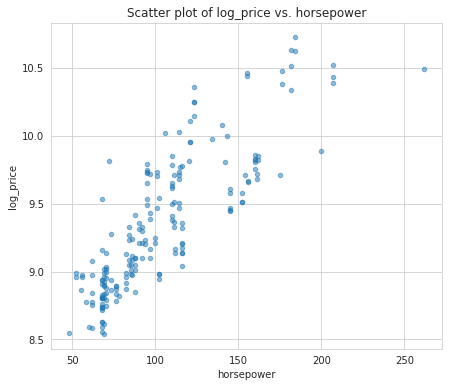

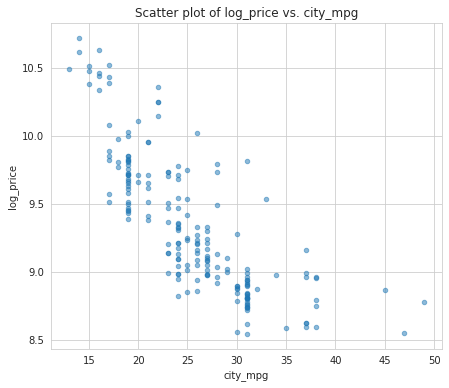

In [ ]:
num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter(auto_prices,num_cols,'log_price')  

Comparing the earlier results, it does appear that the relationships between curb_weight and log_price and city_mpg and log_price are more linear, compared to the relationships between curb_weight and price and city_mpg and price respectively.

In [ ]:
auto_prices.to_csv('Auto_data_prepped.csv',header=True,index=False)

# **Model Building for prediction**

In [ ]:
auto_prices=pd.read_csv("Auto_data_prepped.csv")

In [ ]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss
import math

Encode categorical columns

In [ ]:
auto_prices.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
log_price            float64
dtype: object

In [ ]:
num_cols=[]
for c in auto_prices.columns:
  if auto_prices.dtypes[c]!='object':
    num_cols.append(c)
num_cols

['symboling',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'bore',
 'stroke',
 'compression_ratio',
 'horsepower',
 'peak_rpm',
 'city_mpg',
 'highway_mpg',
 'price',
 'log_price']

In [ ]:
num_features=['symboling','wheel_base','length','width','curb_weight','engine_size','bore','peak_rpm','city_mpg']

In [ ]:
cat_cols

['fuel_type',
 'aspiration',
 'num_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'num_of_cylinders']

In [ ]:
#num_doors was insignificant in predicting price
#engine location: very high class imbalance (very less cars with rear engine)

cat_features=['make','fuel_type','aspiration','body_style','drive_wheels','engine_type','num_of_cylinders','fuel_system']
dummies=pd.get_dummies(auto_prices[cat_features])
dummies.shape

(193, 47)

In [ ]:
auto_prices=pd.concat([auto_prices,dummies],axis=1)

In [ ]:
auto_prices.columns

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'log_price', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel_type_diesel', 'fuel_type_gas',
       'aspiration_std', 'aspiration_turbo', 'body_style_hardtop_convert',
       'body_style_hatchback', 'body_style_sedan', 'body_style_wagon',
       'drive_wheels_4wd', 'drive_wheels_fwd', 'drive_wheels

In [ ]:
auto_prices.drop(cat_features,axis=1,inplace=True)
auto_prices.shape

(193, 65)

In [ ]:
X=pd.concat([auto_prices[num_features],dummies],axis=1)
y=auto_prices['price']

In [ ]:
X.shape,y.shape

((193, 56), (193,))

Split data into train and test

In [ ]:
xtrain,xtest,ytrain,ytest=ms.train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((135, 56), (135,), (58, 56), (58,))

In [ ]:
scaler=preprocessing.StandardScaler()
xtrain[num_features]=scaler.fit_transform(xtrain[num_features])
xtest[num_features]=scaler.fit_transform(xtest[num_features])

#ytrain=scaler.fit_transform(np.array(ytrain).reshape(-1,1))
#ytest=scaler.fit_transform(np.array(ytest).reshape(-1,1))

In [ ]:
np.array(ytest)[-1]

10245

In [ ]:
#we just take one datapoint aside from the test set in order to make future predictions
xpt=xtest.iloc[-1,:]
ypt=np.array(ytest)[-1]
with open('test_pnt.txt', 'w') as file:
    for listitem in xpt:
        file.write('%f\n' % listitem)

In [ ]:
ypt

10245

In [ ]:
xtest=xtest.iloc[:-1,:]
ytest=np.array(ytest[:-1])
xtest.shape

(57, 56)

**Multiple Linear Regression**

In [ ]:
lreg = linear_model.LinearRegression(fit_intercept=False)
lreg.fit(xtrain,ytrain)

LinearRegression(fit_intercept=False)

In [ ]:
xtrain.columns

Index(['symboling', 'wheel_base', 'length', 'width', 'curb_weight',
       'engine_size', 'bore', 'peak_rpm', 'city_mpg', 'make_alfa-romero',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel_type_diesel',
       'fuel_type_gas', 'aspiration_std', 'aspiration_turbo',
       'body_style_hardtop_convert', 'body_style_hatchback',
       'body_style_sedan', 'body_style_wagon', 'drive_wheels_4wd',
       'drive_wheels_fwd', 'drive_wheels_rwd', 'engine_type_dohc',
       'engine_type_l', 'engine_type_ohc', 'engine_type_ohcf',
       'engine_type_ohcv', 'num_of_cylinders_eight_twelve',
       'num_of_cylinders_five_six', 'num_of_cylinders_three_four',
       'fuel_system_1bbl', 'fuel_system_2bbl',

In [ ]:
xtrain.head()

symboling  wheel_base    length     width  curb_weight  engine_size  \
157   0.976910   -0.104705  0.129816 -0.126497    -0.023319     0.416895   
16   -0.612040    1.669833  1.727197  2.408753     1.783664     1.967265   
51    0.182435   -0.043514  0.252691  0.304017    -0.337741    -0.173722   
112   0.182435   -0.823698 -0.553679 -0.987525    -1.087809    -0.961211   
169  -1.406515    0.828458  1.020663  0.304017     1.113148     0.786031   

         bore  peak_rpm  city_mpg  make_alfa-romero  ...  \
157  1.028759 -0.574516 -0.223476                 0  ...   
16   1.028759  0.732669 -1.587918                 0  ...   
51   0.211385 -0.574516  0.079733                 0  ...   
112 -1.281211  0.950533  0.837756                 0  ...   
169 -0.215071  0.296941 -0.981500                 0  ...   

     num_of_cylinders_eight_twelve  num_of_cylinders_five_six  \
157                              0                          0   
16                               0                          1   
51                               0                          0   
112                              0                          0   
169                              0                          1   

     num_of_cylinders_three_four  fuel_system_1bbl  fuel_system_2bbl  \
157                            1                 0                 0   
16                             0                 0                 0   
51                             1                 0                 1   
112                            1                 0                 1   
169                            0                 0                 0   

     fuel_system_idi  fuel_system_mfi  fuel_system_mpfi  fuel_system_spdi  \
157                0                0                 1                 0   
16                 0                0                 1                 0   
51                 0                0                 0                 0   
112                0                0                 0                 0   
169                0                0                 1                 0   

     fuel_system_spfi  
157                 0  
16                  0  
51                  0  
112                 0  
169                 0  

[5 rows x 56 columns]

In [ ]:
print(lreg.intercept_)
print(lreg.coef_)

0.0
[-4.20357967e+02 -6.94017151e+01 -2.11408436e+03  1.66816989e+03
  5.36496145e+03  3.72474354e+03 -1.54797780e+03  9.79756500e+02
  5.99588136e+02  2.73551216e+03  3.05635461e+03  1.04883712e+04
  2.96926720e+03 -2.25233694e+03 -8.36484350e+02 -1.10366598e+03
 -5.83741894e+02 -9.28248853e+01  1.90297770e+03 -5.00222086e-12
 -3.07537367e+03 -3.69260121e+02 -2.84564746e+03 -2.76073104e+03
  6.26564858e+03  2.35460348e+03 -9.72026169e+03 -6.02663787e+02
 -1.54255065e+02  1.35381483e+03  2.38915364e+03  4.34014924e+03
  2.58080286e+03  4.14850002e+03  3.04321600e+03  1.00683550e+03
  1.62556780e+03  1.05368358e+03  2.12513935e+03  2.19437518e+03
  2.40978834e+03 -3.67789451e+02  1.23619740e+02 -2.79069183e+02
  1.02553459e+04 -3.00280412e+03  6.48783068e+03 -1.35142675e+03
  1.59289895e+03 -2.61694799e+02  2.47432858e+03  2.38915364e+03
 -4.16211196e+02  7.59952254e+02  6.80660950e+02  1.10311345e+03]


In [ ]:
def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)

    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
   
ypred = lreg.predict(xtest) 
print_metrics(ytest, ypred)    

Mean Square Error      = 7064317.360838275
Root Mean Square Error = 2657.878357043128
Mean Absolute Error    = 1849.1463229524609
Median Absolute Error  = 1127.1883408815993
R^2                    = 0.8915160276606435


Residual plots

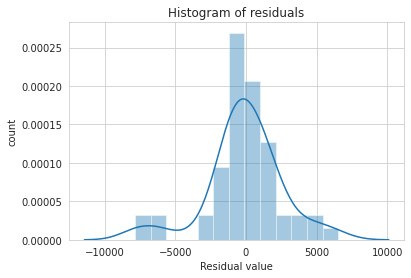

In [ ]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(ytest.reshape(-1,1), ypred.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(ytest, ypred)    

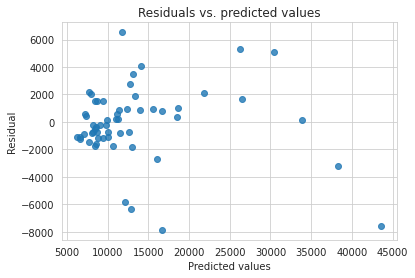

In [ ]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(ytest, ypred) 

The plot shows that model predicts low-price cars reasonably well but does not perform well in the case of higher priced cars

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(xtrain,ytrain)

RandomForestRegressor(criterion='mse', n_estimators=15, n_jobs=-1,
                      random_state=20)

In [ ]:
Rfpred=Rf.predict(xtest)
print_metrics(ytest,Rfpred)

Mean Square Error      = 3848651.323660386
Root Mean Square Error = 1961.7979823774888
Mean Absolute Error    = 1387.6799220272903
Median Absolute Error  = 960.0
R^2                    = 0.9408977594842572


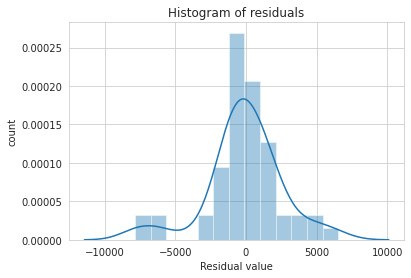

In [ ]:
hist_resids(ytest,Rfpred)

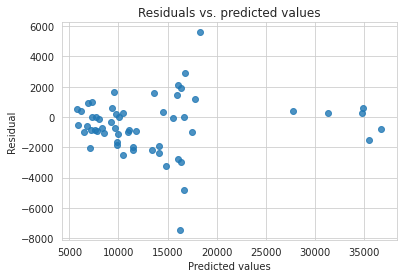

In [ ]:
resid_plot(ytest,Rfpred)

# **SHAP( SHapely Additive exPlanations)**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
explainer=shap.Explainer(Rf.predict,xtest)
shap_values=explainer(xtest)

Permutation explainer: 58it [00:29,  1.27it/s]


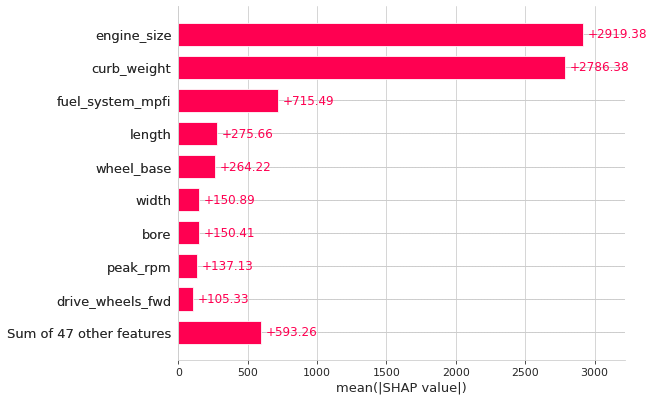

In [ ]:
shap.plots.bar(shap_values,show=False)
plt.savefig('gloabl_bar.jpg')

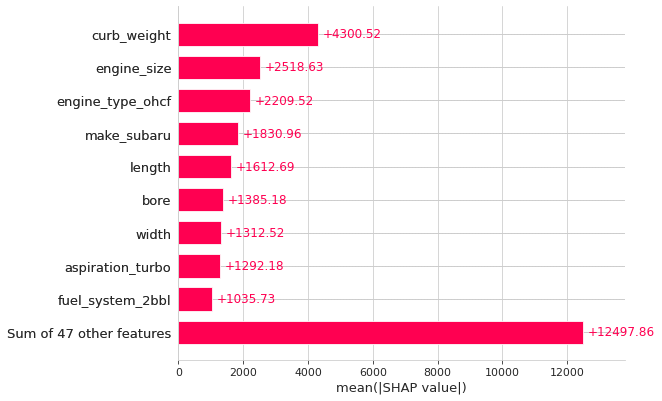

In [ ]:
exp2=shap.Explainer(lreg.predict,xtest)
shap_values2=exp2(xtest)
shap.plots.bar(shap_values2)

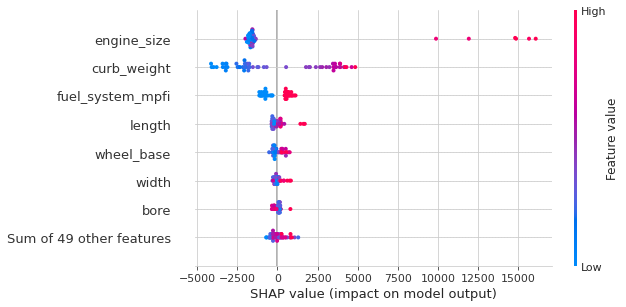

In [ ]:
shap.plots.beeswarm(shap_values,max_display=8,show=False) 
plt.savefig('global_beeswarm')

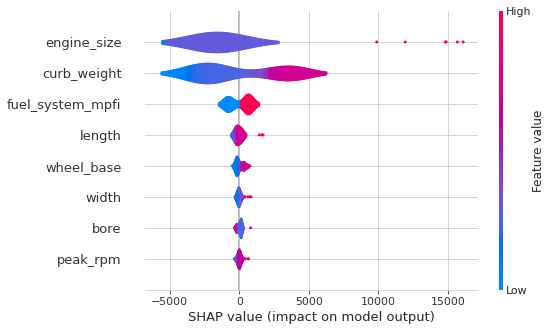

<Figure size 432x288 with 0 Axes>

In [ ]:
shap.summary_plot(shap_values,plot_type='violin',max_display=8,show='False')
plt.savefig('global_violin.jpg')

Loacal interpretability

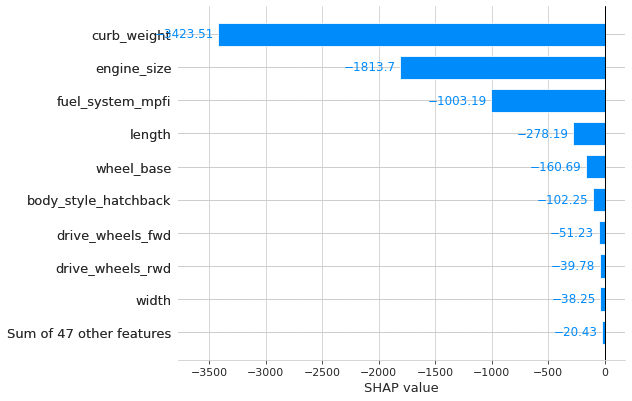

In [ ]:
plt.figure(figsize=(10,10))
shap.plots.bar(shap_values[0],show=False)
plt.savefig('local_bar.jpg')

In [ ]:
shap.initjs()
shap.plots.force(shap_values[10])

Create pickle file to deploy model

In [ ]:
import pickle 
pickle_out=open('auto_pred.pkl','wb')
pickle.dump(Rf,pickle_out) 
pickle_out.close()

In [ ]:
pickle_out2=open('auto_pred_mlr.pkl','wb')
pickle.dump(lreg,pickle_out2)
pickle_out2.close()